### Student Information
Name: 周恭麟

Student ID: 110550201

GitHub ID: benedictdavon

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Importing Data

In [2]:
X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

C:\Users\Davon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Data Exploratory

In [3]:
# Get the first 5 rows of the dataframe and the information about the dataframe
print(X.head())
print(X.info())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None


In [4]:
# An example of what the subset contains
print("\n".join(X.comment[0].split(". ")))
print("=====================================")
print("\n".join(X.comment[1].split(". ")))

He was a singer with a golden voice that I love to hear all the time
I was his great fan at the age of 16years in those days and still now
Although we have many singers now, but, I can vouch for Jim Reeves all the time
You feel relaxed, emotional and loving
Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [5]:
X.isnull().sum()

sentiment    0
comment      0
dtype: int64

In [6]:
# Check for missing values
print(X['comment'].apply(lambda x: x in [None, np.nan, 'NaN', 'None', '']).sum())

0


In [7]:
# Check for duplicates
sum(X.duplicated("comment"))

1

In [8]:
X.drop_duplicates("comment", inplace=True)

In [9]:
sum(X.duplicated("comment"))

0

# 3. Data Preprocessing

In [10]:
# Create a new column called sentiment that is 1 if the 
# sentiment is nostalgia and 0 otherwise
X['category'] = X['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)
X.head()

,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


### 3.1 Cleaning the Data

In [11]:
import re

In [12]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)

    # Removing multiple spaces
    text = re.sub(r"\s+", " ", text)
    
    # # Tokenize
    words = text.split()

    # # Optionally remove stop words
    # words = [word for word in words if word not in stopwords.words('english')]

    # # Optionally apply stemming/lemmatization
    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    return ' '.join(words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Davon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Davon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Davon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
X['comment'] = X['comment'].apply(preprocess_text)

In [14]:
X.head()

,sentiment,comment,category
0,not nostalgia,he was singer with golden voice that love to h...,0
1,nostalgia,the mist beautiful voice ever listened to him ...,1
2,nostalgia,i have most of mr reeves songs always love his...,1
3,not nostalgia,30 day leave from 1st tour in viet nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


### 3.2 Sampling

In [15]:
X_sample = X.sample(n=500)
len(X_sample)

500

In [16]:
X_sample[0:4]

,sentiment,comment,category
838,nostalgia,simple times oh how miss them,1
665,nostalgia,i was only 4 oh wow how time flies,1
1077,not nostalgia,and this is why love hanging out with my paren...,0
330,not nostalgia,27 people dont have good taste in real music a...,0


In [17]:
%matplotlib inline

sentiment
nostalgia        260
not nostalgia    240
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

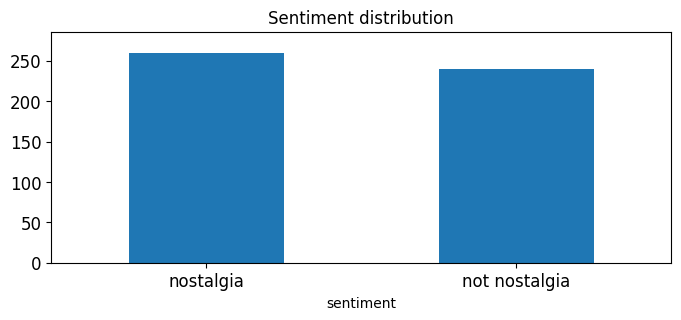

In [18]:
print(X_sample.sentiment.value_counts())

max_val = max(X_sample.sentiment.value_counts())
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, max_val+0.1*max_val], # add 10% to the max value 
                                           rot = 0, fontsize = 12, figsize = (8,3))

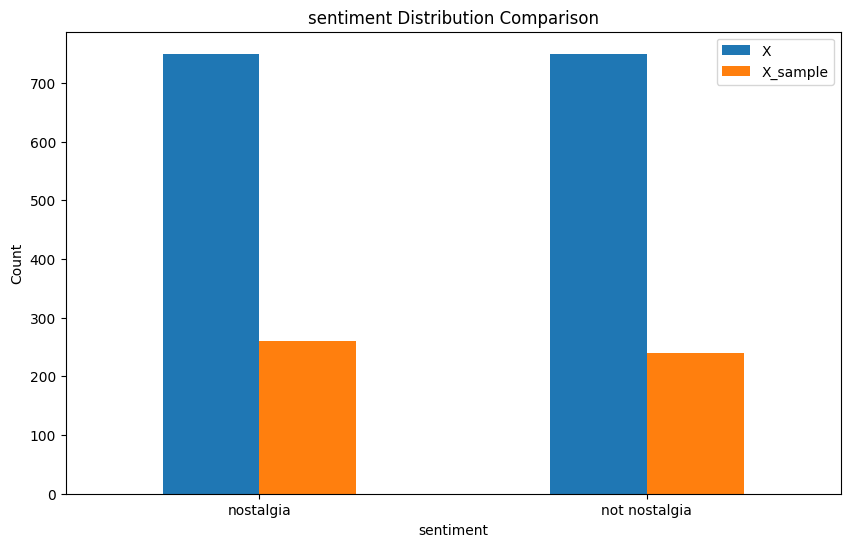

In [19]:
import matplotlib.pyplot as plt

# Get the value counts for both dataframes
x_counts = X['sentiment'].value_counts()
x_sample_counts = X_sample['sentiment'].value_counts()

# Create a new dataframe to hold both counts
comparison_df = pd.DataFrame({'X': x_counts, 'X_sample': x_sample_counts})

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('sentiment Distribution Comparison')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

### 3.3 Feature Creation

In [20]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [21]:
X['unigrams'] = X['comment'].apply(lambda x: tokenize_text(x))

In [22]:
X[0:4]["unigrams"]

0    [he, was, singer, with, golden, voice, that, l...
1    [the, mist, beautiful, voice, ever, listened, ...
2    [i, have, most, of, mr, reeves, songs, always,...
3    [30, day, leave, from, 1st, tour, in, viet, na...
Name: unigrams, dtype: object

In [23]:
list(X[0:1]['unigrams'])

[['he',
  'was',
  'singer',
  'with',
  'golden',
  'voice',
  'that',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  'although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  'but',
  'can',
  'vouch',
  'for',
  'jim',
  'reeves',
  'all',
  'the',
  'time',
  'you',
  'feel',
  'relaxed',
  'emotional',
  'and',
  'loving',
  'thank',
  'you',
  'lord',
  'for',
  'his',
  'life']]

### 3.4 Feature Subset Selection

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1725)	1
  (0, 3893)	2
  (0, 3229)	1
  (0, 3984)	1
  (0, 1582)	1
  (0, 3851)	1
  (0, 3573)	1
  (0, 2188)	1
  (0, 3644)	1
  (0, 1734)	1
  (0, 269)	2
  (0, 3576)	3
  (0, 3631)	2
  (0, 1795)	2
  (0, 1634)	1
  (0, 1352)	1
  (0, 373)	1
  (0, 245)	1
  (0, 2552)	1
  (0, 22)	1
  (0, 1879)	1
  (0, 3607)	1
  (0, 991)	1
  (0, 300)	2
  (0, 3406)	1
  (0, 2537)	2
  (0, 284)	1
  (0, 3906)	1
  (0, 1718)	1
  (0, 2249)	1
  (0, 3232)	1
  (0, 641)	1
  (0, 660)	1
  (0, 3859)	1
  (0, 1451)	2
  (0, 1984)	1
  (0, 2907)	1
  (0, 4059)	2
  (0, 1374)	1
  (0, 2926)	1
  (0, 1222)	1
  (0, 2199)	1
  (0, 3568)	1
  (0, 2177)	1
  (0, 2118)	1


In [25]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [26]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [27]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [28]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

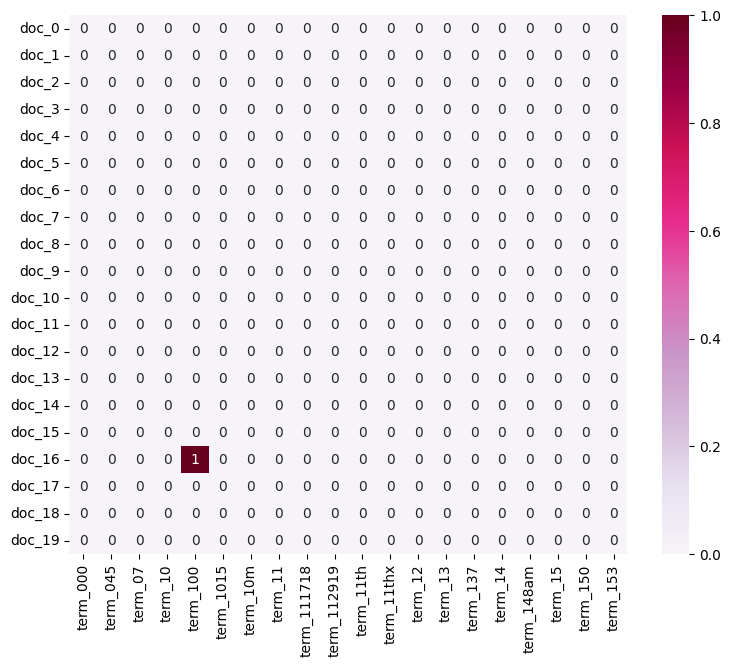

In [29]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

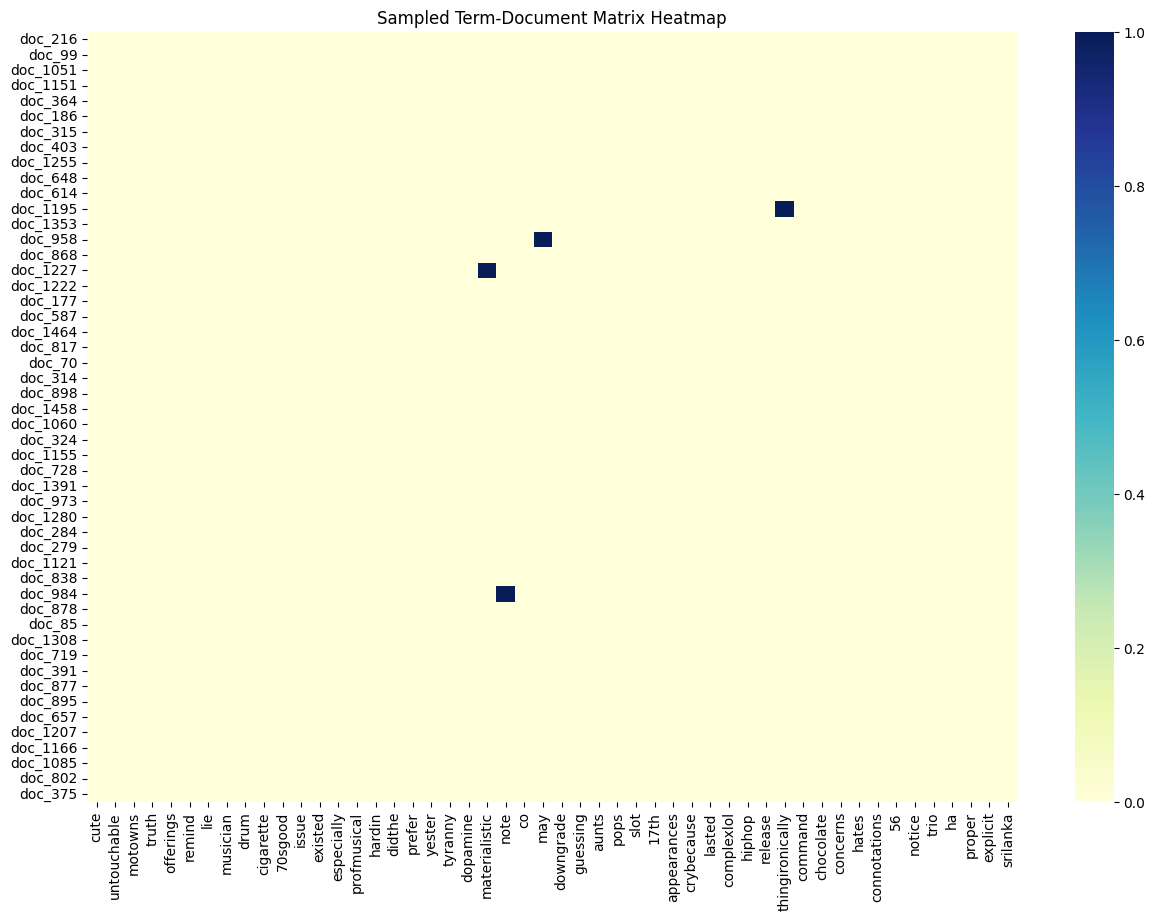

In [30]:
# Answer here
# To plot a sample of the entire term-document matrix efficiently, we can use the following approach:

# Define the number of documents and terms to sample
num_docs = 50
num_terms = 50

# Randomly sample documents and terms
sampled_docs = np.random.choice(X_counts.shape[0], num_docs, replace=False)
sampled_terms = np.random.choice(X_counts.shape[1], num_terms, replace=False)

# Create the sampled term-document matrix
sampled_matrix = X_counts[sampled_docs, :][:, sampled_terms].toarray()

# Get the feature names for the sampled terms
sampled_feature_names = count_vect.get_feature_names_out()[sampled_terms]

# Create the document labels
sampled_doc_labels = [f"doc_{i}" for i in sampled_docs]

# Create a DataFrame for the heatmap
df_sampled = pd.DataFrame(sampled_matrix, columns=sampled_feature_names, index=sampled_doc_labels)

# Plot the heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(df_sampled, cmap="YlGnBu", vmin=0, vmax=1, annot=False)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.show()

### 3.5 Attribute Transformation

In [31]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

print(term_frequencies)

[array([2], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([15], dtype=int64), array([5], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([5], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([11], dtype=int64), array([8], dtype=int64), array([1], dtype=int64), array([15], dtype=int64), array([1], dtype=int64), array([8], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([12], dtype=int64), array([1], dtype=int64), array([12], dtype=int64), array([1], dtype=int64), array([8], dtype=int64), array([4], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([4], dtype=int64), array([2], dtype=int64), array([3], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([4], dtype=int64), array([4], dtype=in

In [32]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [33]:
term_frequencies[0] #sum of first term: 00

2

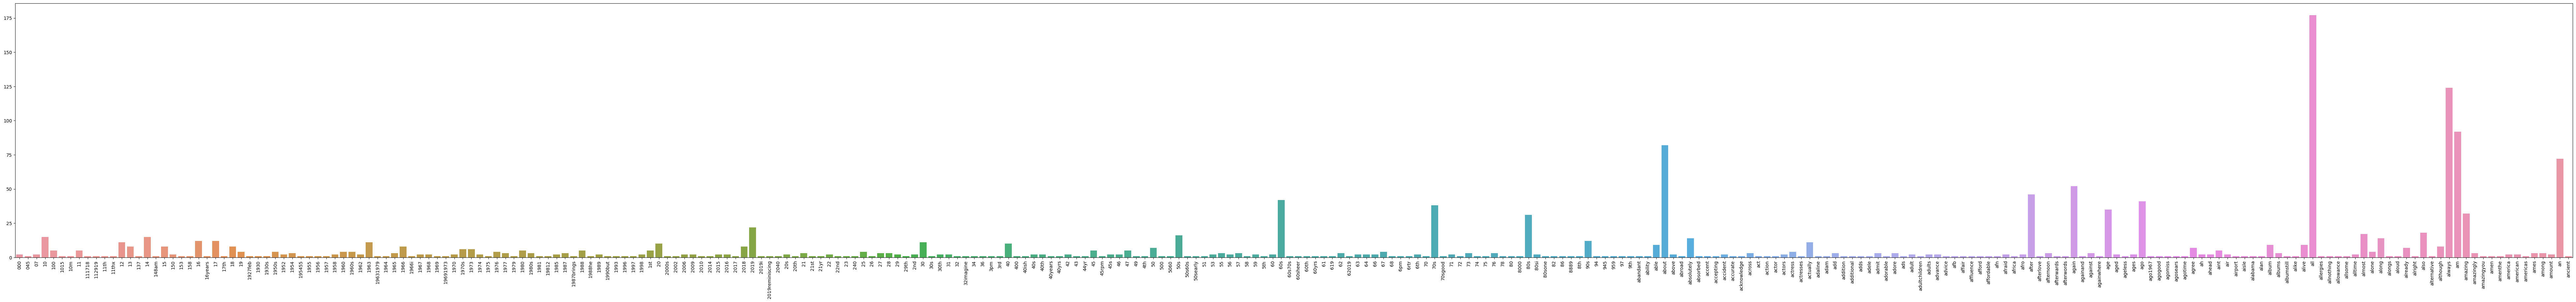

In [34]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [35]:
# Import necessary libraries
import plotly.graph_objects as go

# Assuming count_vect and term_frequencies are already defined
x_values = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies[:300]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=x_values, y=y_values)])

# Update layout for figure size and x-axis label rotation
fig.update_layout(
    title='Term Frequencies',
    xaxis_title='Terms',
    yaxis_title='Frequencies',
    xaxis=dict(tickangle=90),
    width=2000,  # Adjust width as needed
    height=500   # Adjust height as needed
)

# Show the plot
fig.show()

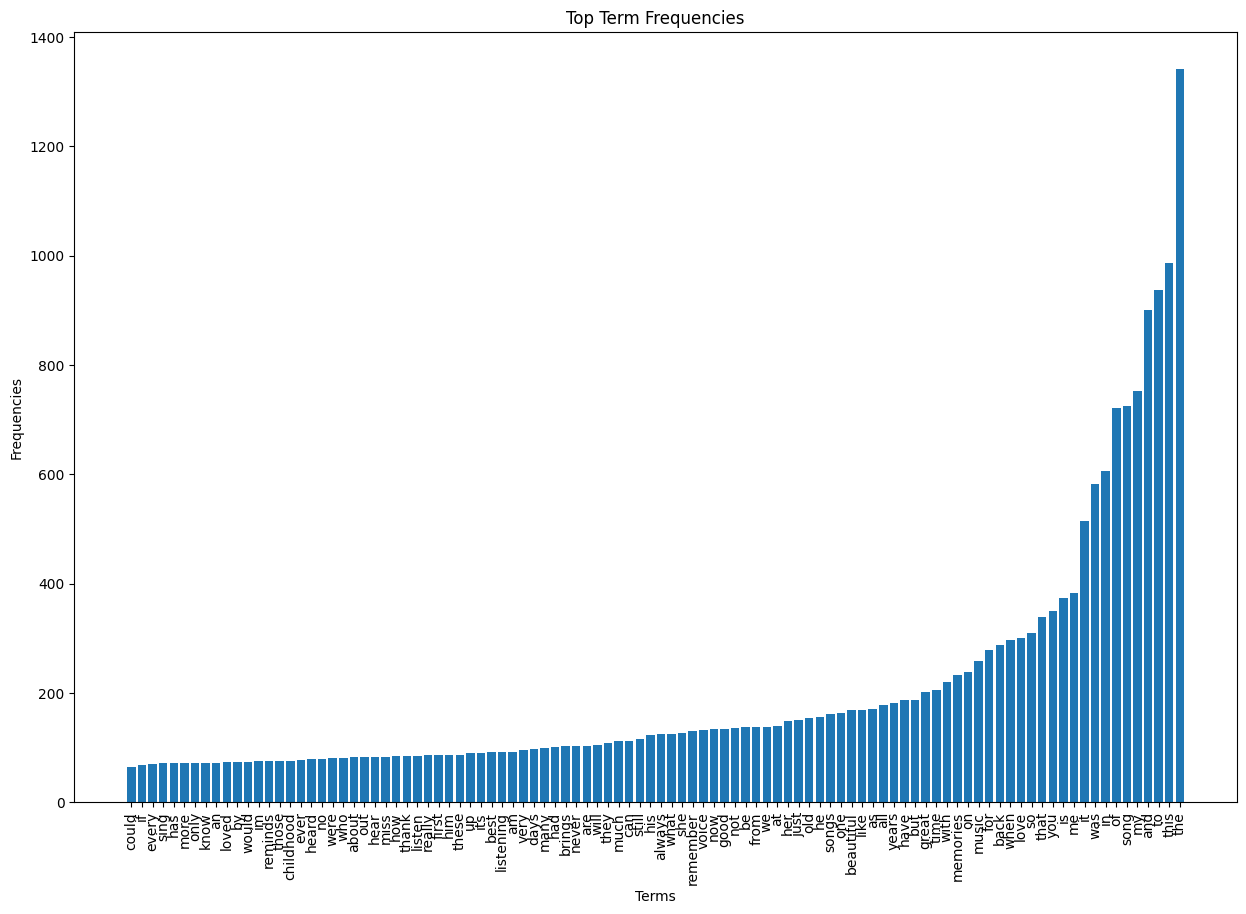

In [36]:
# Define the number of terms to visualize
num_terms_to_visualize = 100

# Get the top `num_terms_to_visualize` terms based on their frequencies
top_terms_indices = np.argsort(term_frequencies)[-num_terms_to_visualize:]
top_terms = count_vect.get_feature_names_out()[top_terms_indices]
top_frequencies = term_frequencies[top_terms_indices]

# Create a bar plot for the top terms
plt.figure(figsize=(15, 10))
plt.bar(top_terms, top_frequencies)
plt.xticks(rotation=90)
plt.title('Top Term Frequencies')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.show()

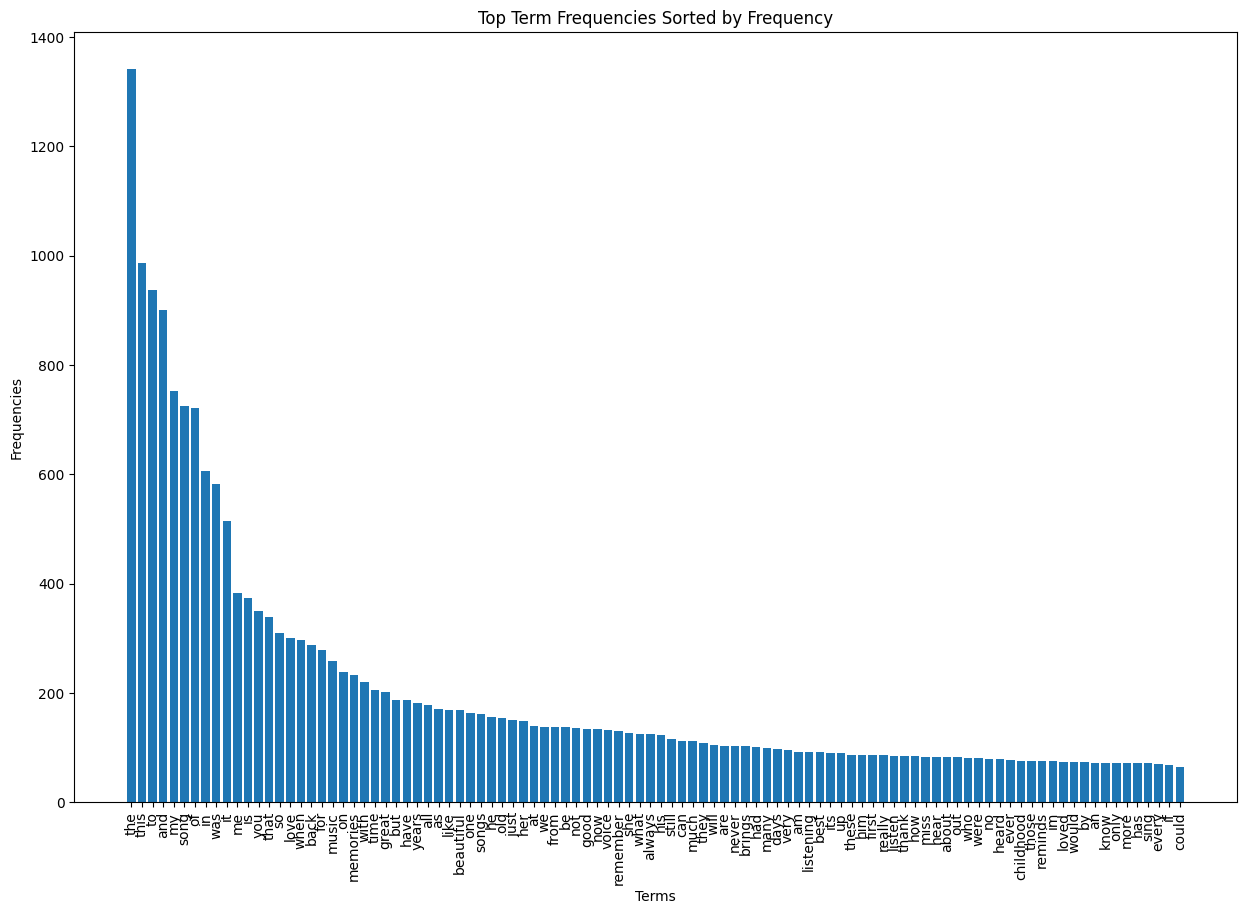

In [37]:
# Sort the terms by frequency
sorted_indices = np.argsort(top_frequencies)[::-1]
sorted_terms = top_terms[sorted_indices]
sorted_frequencies = top_frequencies[sorted_indices]

# Create a bar plot for the sorted terms
plt.figure(figsize=(15, 10))
plt.bar(sorted_terms, sorted_frequencies)
plt.xticks(rotation=90)
plt.title('Top Term Frequencies Sorted by Frequency')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.show()

In [38]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

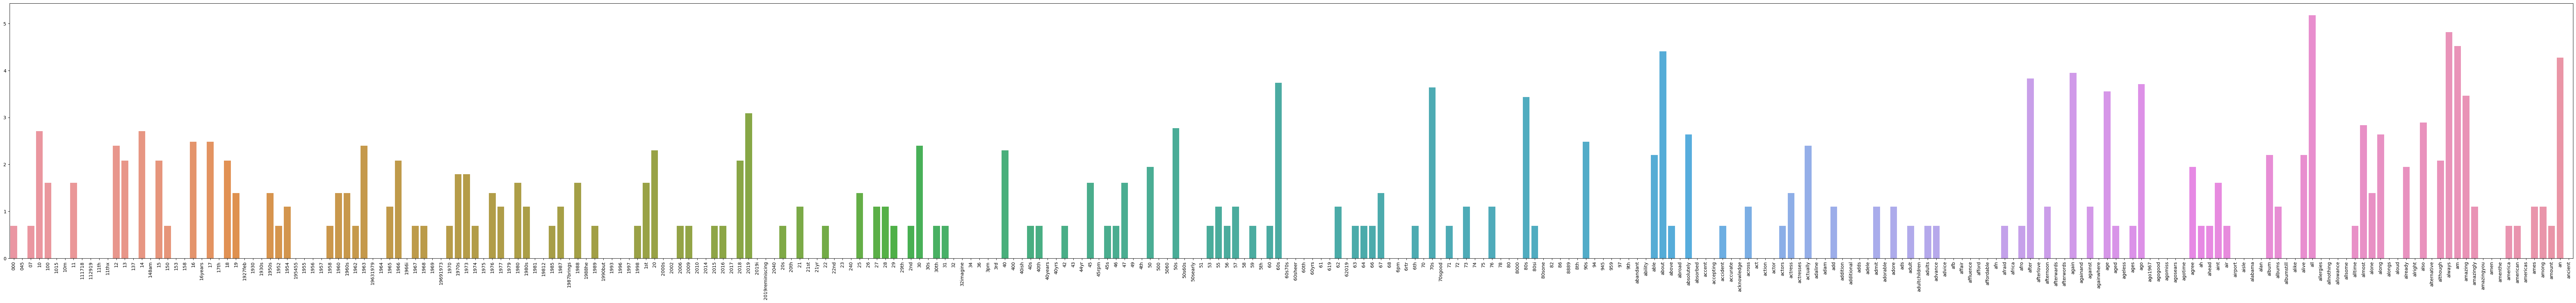

In [39]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [40]:
# Import necessary libraries
import plotly.graph_objects as go

x_values = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies_log[:300]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=x_values, y=y_values)])

# Update layout for figure size and x-axis label rotation
fig.update_layout(
    title='Term Frequencies Log',
    xaxis_title='Terms',
    yaxis_title='Frequencies',
    xaxis=dict(tickangle=90),
    width=2000,  
    height=500   
)

# Show the plot
fig.show()

### 3.6 Feature Extraction

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(X):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(X['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [42]:
# Display the filtered DataFrame for one of the sentiments, feel free to change the number in the vector
sentiment_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for sentiment {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for sentiment nostalgia:


,07,10,1015,11,11th,12,13,14,148am,15,...,youngwe,your,youre,yours,youth,youthful,youthmemories,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


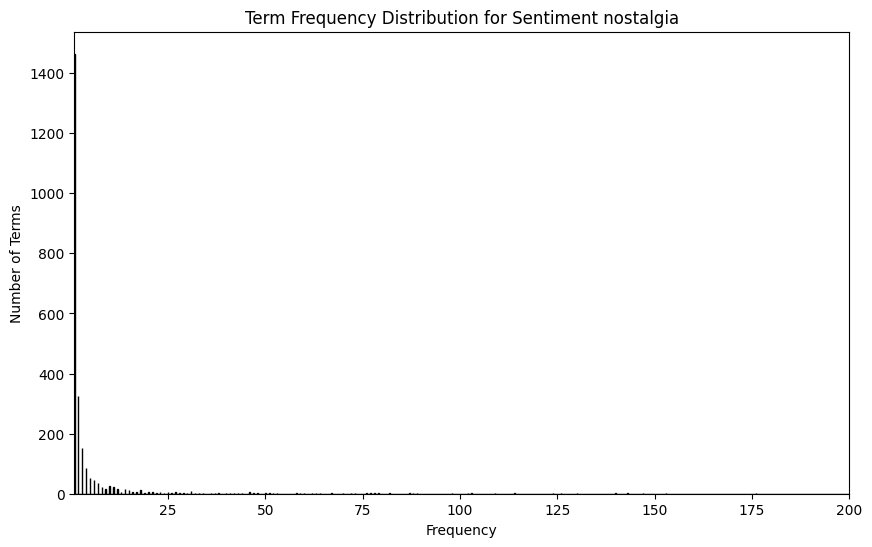

In [43]:
# Sum over all documents to get total frequency for each word
sentiment_number = 1  # Change to a valid index within the range of sentiments
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [44]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiments[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 137
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'is', 'in', 'you', 'it', 'my', 'that', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'with', 'great', 'all', 'not', 'he', 'on', 'be', 'me', 'voice', 'songs', 'just', 'as', 'what', 'beautiful', 'her', 'time', 'will', 'when', 'can', 'they', 'she', 'from', 'his', 'its', 'are', 'at', 'good', 'no', 'always', 'never', 'know', 'about', 'now', 'much', 'really', 'if', 'more', 'we', 'who', 'im', 'best', 'by', 'ever', 'think', 'how', 'still', 'very', 'has', 'dont', 'only', 'would', 'thank', 'out', 'am', 'these', 'could', 'old', 'him', 'listen', 'an', 'do', 'hear', 'up', 'had', 'many', 'there', 'singer', 'been', 'version', 'too', 'most', 'here', 'such', 'your', 'get', 'heard', 'world', 'people', 'listening', 'some', 'man', 'video', 'than', 'years', 'real', 'nice', 'sing', 'were', 'their', 'today', 'singing', 'better', 'life', 'heart', 'did', 'why', 'those', 'come',

In [45]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 27
Filtered terms: ['legendary', 'musician', 'musici', 'musically', 'museum', 'mums', 'mummy', 'mum', 'muchthank', 'muchm', 'ms', 'mph', 'moved', 'motowns', 'motown', 'motor', 'motivate', 'mostly', 'mornings', 'moral', 'moon', 'moodier', 'mood', 'monumental', 'montgomery', 'money', 'monday']


In [46]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[category_number]}:")
term_document_dfs[sentiments[category_number]]



For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
legendary     1
musician      1
musici        1
musically     1
museum        1
mums          1
mummy         1
mum           1
muchthank     1
muchm         1
ms            1
mph           1
moved         1
motowns       1
motown        1
motor         1
motivate      1
mostly        1
mornings      1
moral         1
moon          1
moodier       1
mood          1
monumental    1
montgomery    1
money         1
monday        1
dtype: int64
Top 5.0% words: 
elvis      21
first      22
every      22
them       22
lyrics     22
         ... 
of        361
to        394
and       443
this      449
the       705
Length: 137, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup           1
haircut       1
hair          1
hahaha        1
hadnt         1
habit3        1
seirus        1
gulf          1
self          1
guardhouse    1
guard         1
guam          1
grows     

,000,045,10,100,10m,111718,112919,11thx,12,137,...,youngest,youngsters,youre,yourself,youth,youtube,yrs,yuo,zealand,zulusbarbados
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.7 

In [47]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 733
Number of items : 2335
Minimum Transaction Size : 1
Average Transaction Size : 8.495225102319235
Maximum Transaction Size : 38
Standard Deviation Transaction Size : 7.076586810309377
Variance in Transaction Sizes : 50.1464935626477
Sparsity : 0.9963617879647455


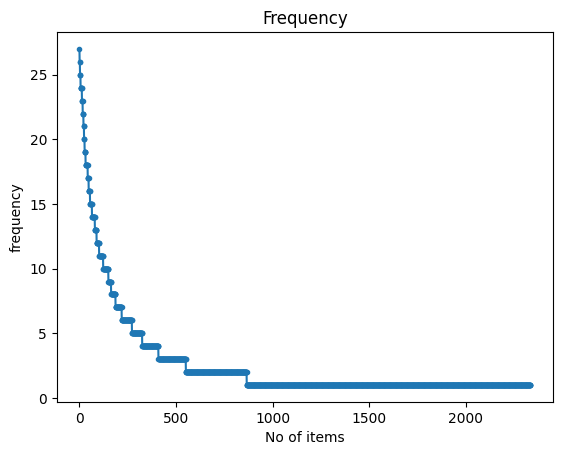

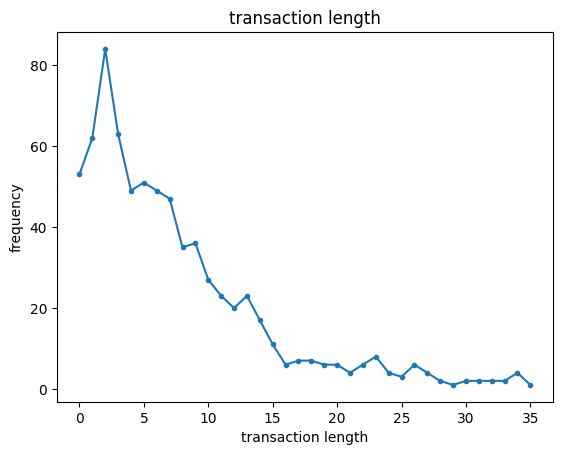

In [48]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2585
Minimum Transaction Size : 1
Average Transaction Size : 8.332885906040268
Maximum Transaction Size : 45
Standard Deviation Transaction Size : 5.866918322059787
Variance in Transaction Sizes : 34.466995020567225
Sparsity : 0.9967764464580116


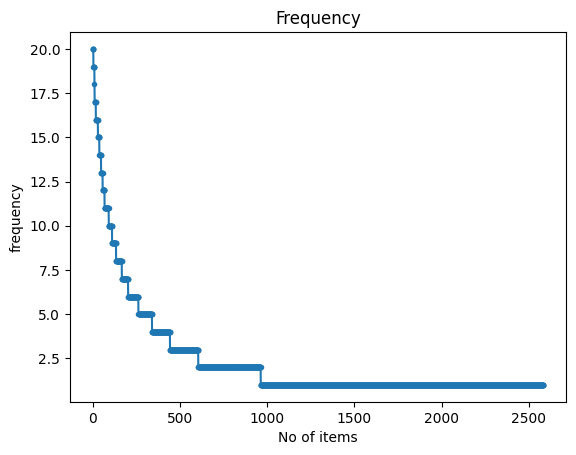

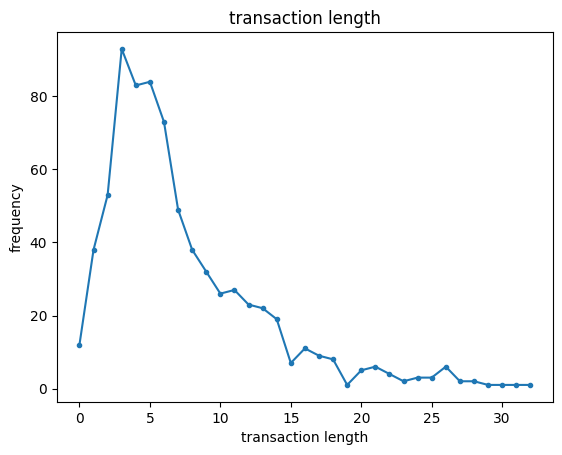

In [49]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [50]:
result = pd.DataFrame(columns=['file_name', 'algorithm', 'minSup', 'patterns'])

file_names = ['td_freq_db_nostalgia.csv', 'td_freq_db_not_nostalgia.csv']

In [51]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_nostalgia= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 165
Runtime: 0.011702299118041992


In [52]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_not_nostalgia= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 135
Runtime: 0.009220361709594727


In [53]:
from PAMI.frequentPattern.basic import FPGrowth as fpgrowth
minSup_values = [3, 6, 9]

for file in file_names:
    for val in minSup_values:
        # Create an FPGrowth object with the specified minSup
        obj = fpgrowth.FPGrowth(iFile=file, minSup=val)
        obj.mine()
    
        # Append the results to the DataFrame
        result.loc[result.shape[0]] = [file, 'FPGrowth', val, str(len(obj.getPatternsAsDataFrame()))]

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [54]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfpgrowth
minSup_values = [3, 6, 9]

for file in file_names:
    for val in minSup_values:
        # Create an MaxFPGrowth object with the specified minSup
        obj = maxfpgrowth.MaxFPGrowth(iFile=file, minSup=val)
        obj.mine()

        # Append the results to the DataFrame
        result.loc[result.shape[0]] = [file, 'MaxFPGrowth', val, str(len(obj.getPatternsAsDataFrame()))]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [55]:

# from PAMI.frequentPattern.topk import FAE as fae

# k_values = [500, 1000, 1500]
# for file in file_names:
#     for k in k_values:
#         # Create a FAE object with the specified k
#         obj = fae.FAE(iFile=file, k=k)
#         obj.mine()

#         # Append the results to the DataFrame
#         result.loc[result.shape[0]] = [file, 'FAE', val, str(len(obj.getPatternsAsDataFrame()))]

In [56]:
result

,file_name,algorithm,minSup,patterns
0,td_freq_db_nostalgia.csv,FPGrowth,3,810
1,td_freq_db_nostalgia.csv,FPGrowth,6,283
2,td_freq_db_nostalgia.csv,FPGrowth,9,165
3,td_freq_db_not_nostalgia.csv,FPGrowth,3,690
4,td_freq_db_not_nostalgia.csv,FPGrowth,6,263
5,td_freq_db_not_nostalgia.csv,FPGrowth,9,135
6,td_freq_db_nostalgia.csv,MaxFPGrowth,3,597
7,td_freq_db_nostalgia.csv,MaxFPGrowth,6,264
8,td_freq_db_nostalgia.csv,MaxFPGrowth,9,163
9,td_freq_db_not_nostalgia.csv,MaxFPGrowth,3,566


In [57]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
118     them       26
117      kid       26
116    could       25
115      has       25
114     such       25
..       ...      ...
134     sung        9
135  perfect        9
136      ago        9
137    happy        9
0     player        9

[208 rows x 2 columns]
Number of patterns discarded: 92


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,000,045,07,10,100,1015,10m,11,111718,112919,...,please,though,wonder,person,sings,sung,perfect,ago,happy,player
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.8 Dimensionality Reduction

In [59]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [60]:
X_pca_tdm.shape

(1499, 2)

In [61]:
X_tsne_tdm.shape

(1499, 2)

In [62]:
X_umap_tdm.shape

(1499, 2)

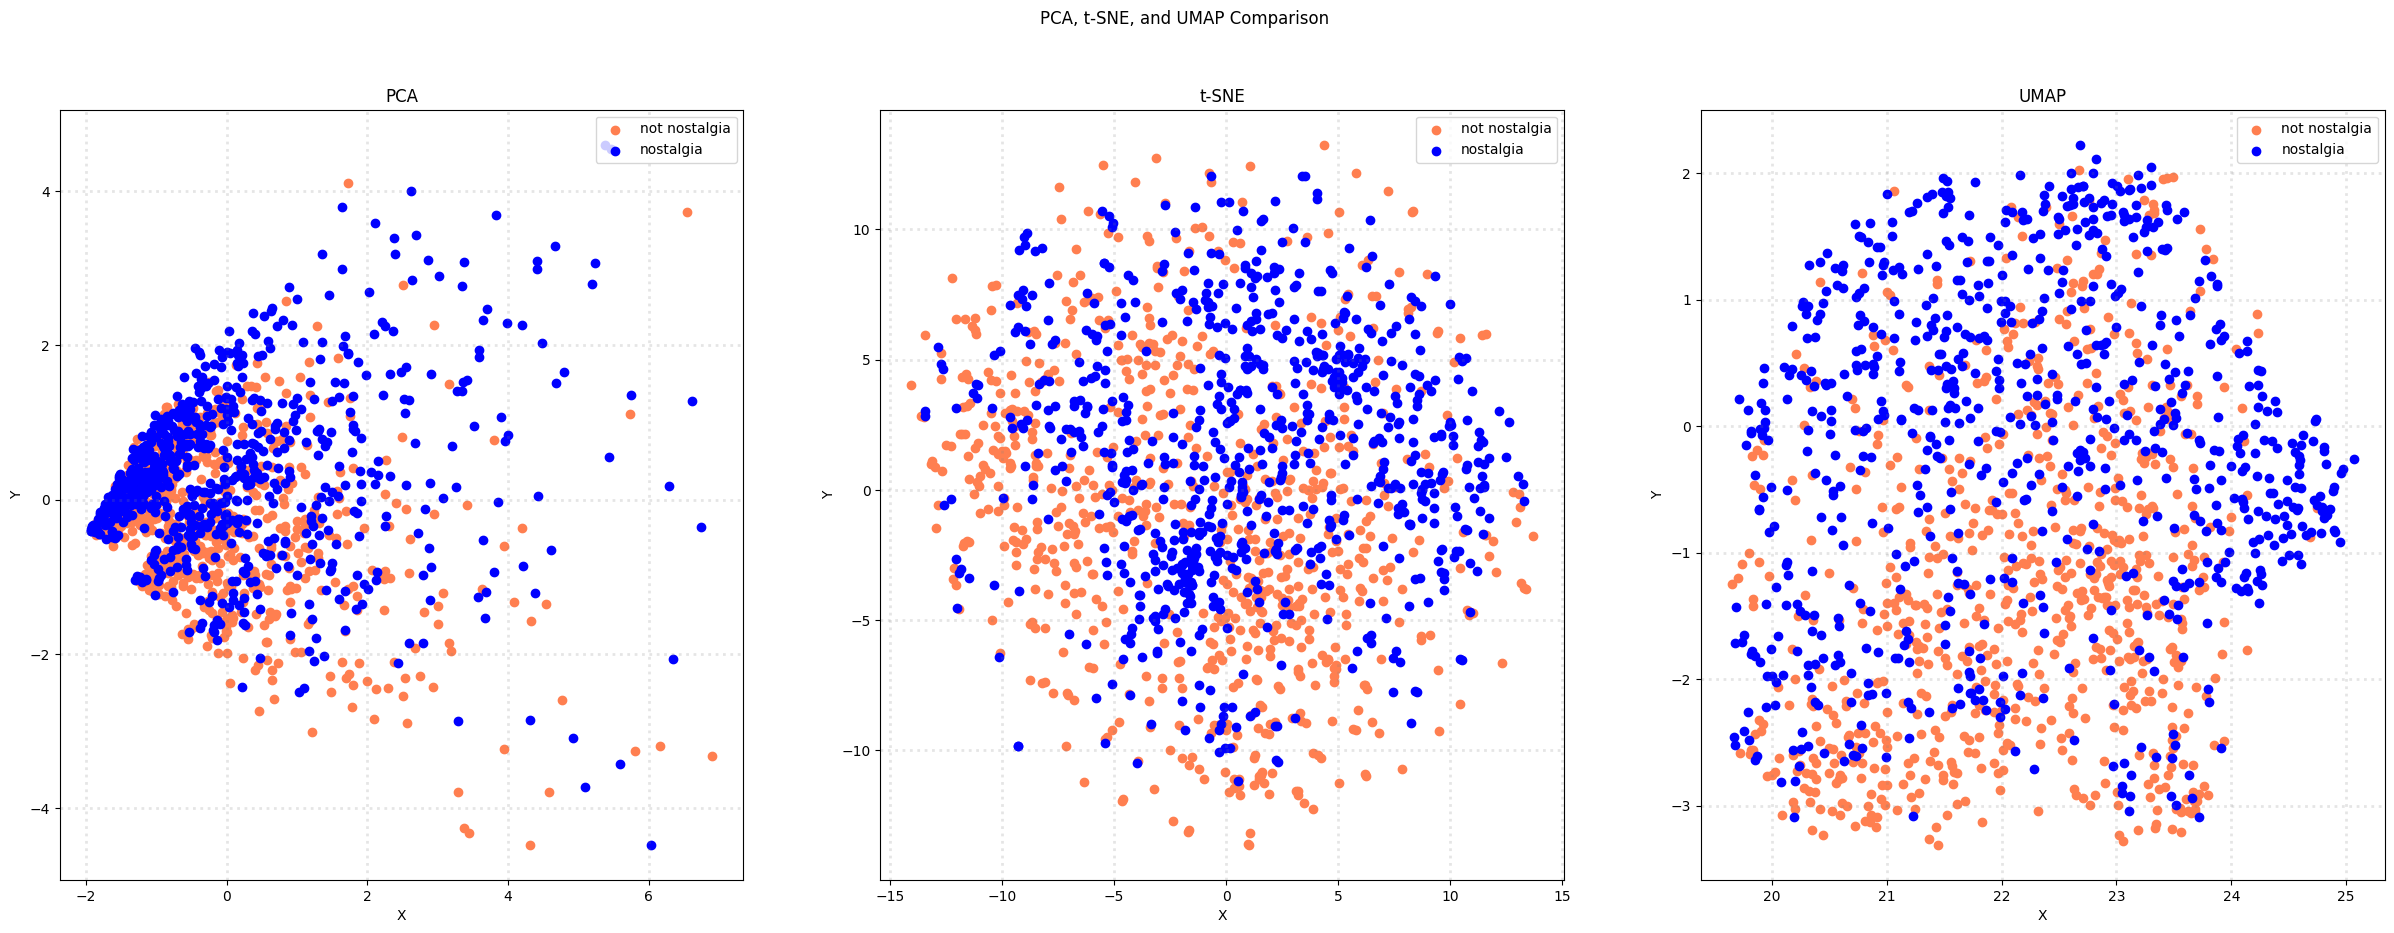

In [63]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [64]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

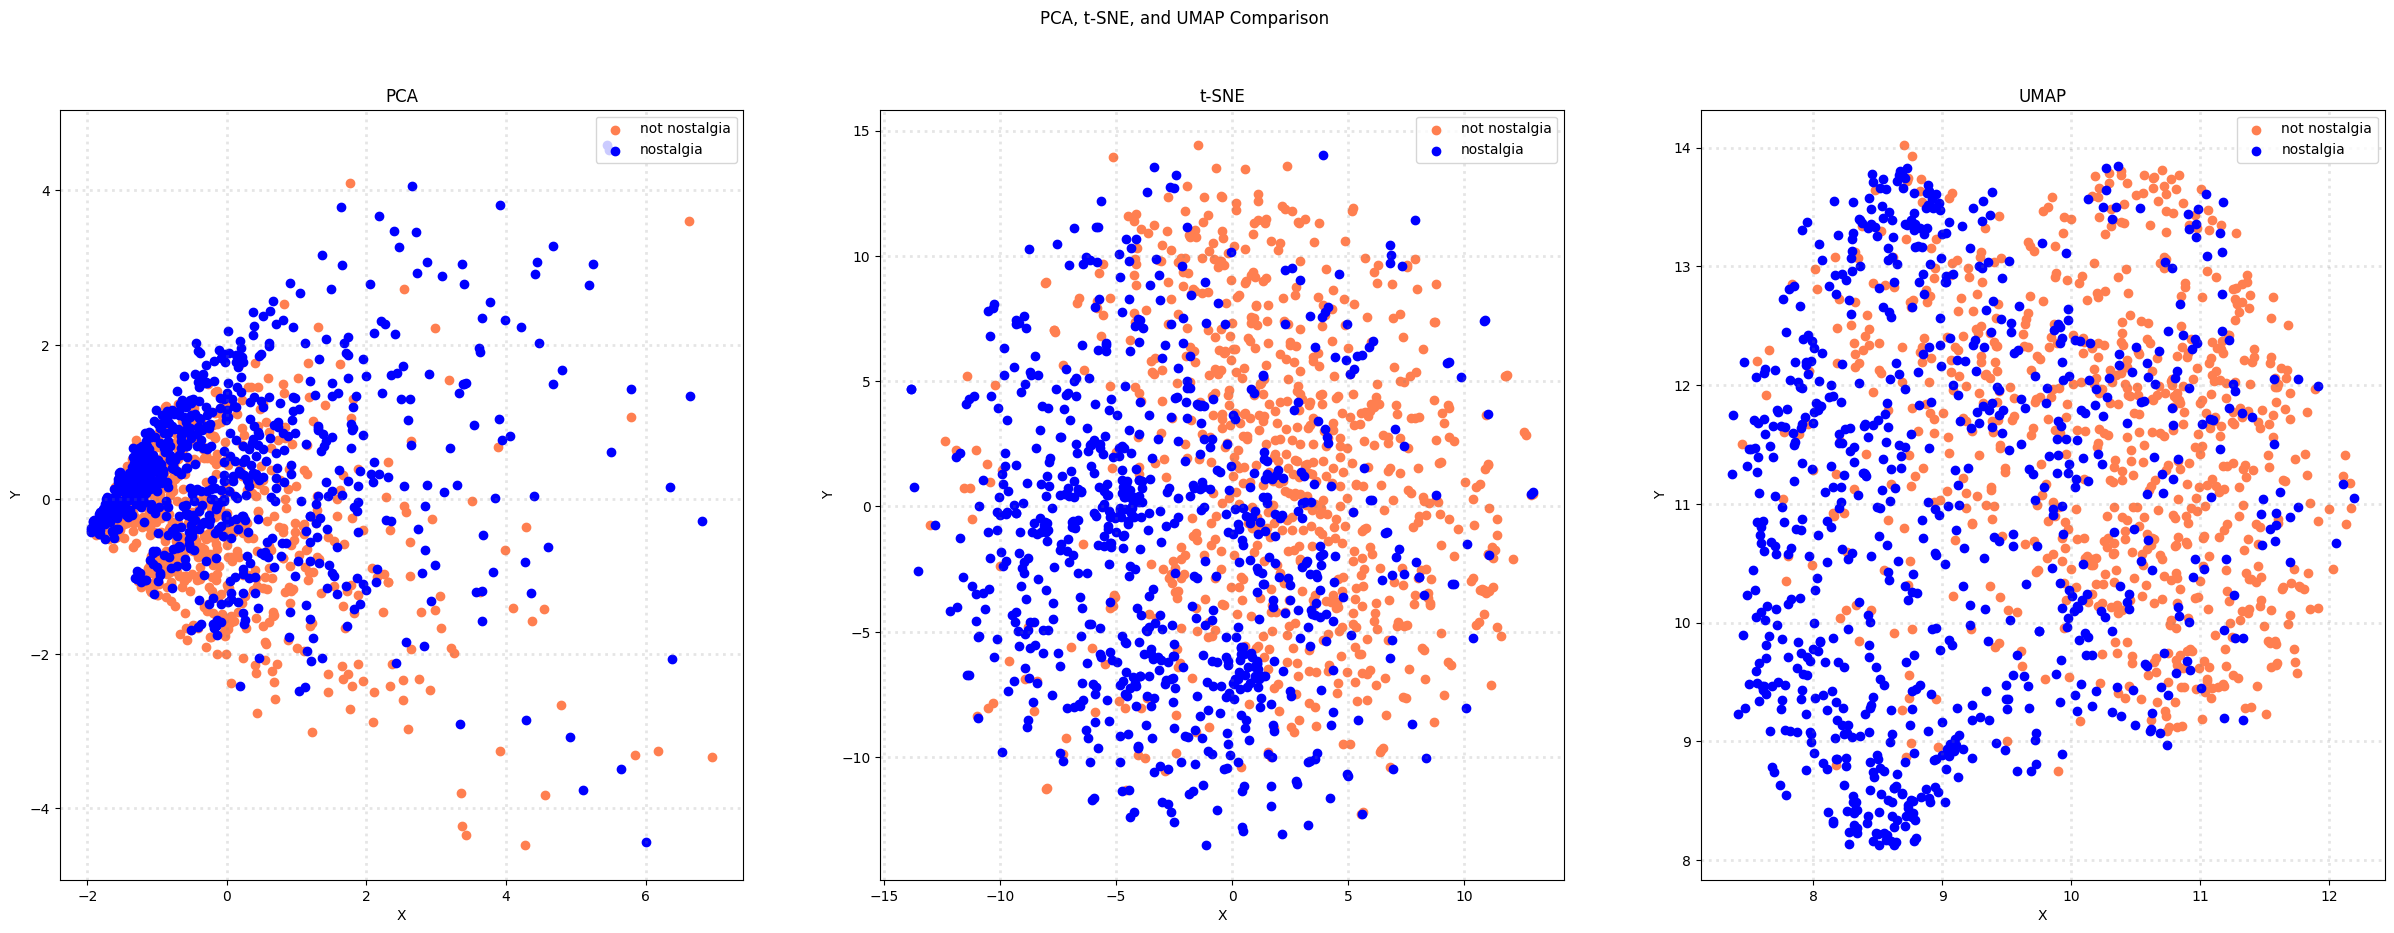

In [65]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Answer here
# Reduce dimensions to 3 using PCA, t-SNE, and UMAP
X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        zs = X_reduced[X['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D plots with different angles
fig = plt.figure(figsize=(18, 12))

# PCA 3D plot
ax = fig.add_subplot(231, projection='3d')
plot_3d_scatter(ax, X_pca_3d, 'PCA (elev=30, azim=30)', elev=30, azim=30)

ax = fig.add_subplot(232, projection='3d')
plot_3d_scatter(ax, X_pca_3d, 'PCA (elev=60, azim=60)', elev=60, azim=60)

ax = fig.add_subplot(233, projection='3d')
plot_3d_scatter(ax, X_pca_3d, 'PCA (elev=90, azim=90)', elev=90, azim=90)

# t-SNE 3D plot
ax = fig.add_subplot(234, projection='3d')
plot_3d_scatter(ax, X_tsne_3d, 't-SNE (elev=30, azim=30)', elev=30, azim=30)

ax = fig.add_subplot(235, projection='3d')
plot_3d_scatter(ax, X_tsne_3d, 't-SNE (elev=60, azim=60)', elev=60, azim=60)

ax = fig.add_subplot(236, projection='3d')
plot_3d_scatter(ax, X_tsne_3d, 't-SNE (elev=90, azim=90)', elev=90, azim=90)

plt.show()

# Create another figure for UMAP 3D plots
fig = plt.figure(figsize=(18, 12))


### 3.9 Discretization and Binarization

In [337]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [338]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

In [340]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
X[:9]

In [ ]:
# Answer here
mlb.fit(X['sentiment'])
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

# 4. Data Exploration

In [343]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

# 5. Data Classification

In [347]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'category']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Ensure target_names is a list of strings
target_names = [str(category_mapping[label]) for label in sorted(category_mapping.keys())]

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [351]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'category']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'category']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [str(category_mapping[label]) for label in sorted(category_mapping.keys())]

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

# 6. New Tasks

### 6.1 Generate TfidVectorizer

In [355]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data
nostalgia_df = pd.read_csv('td_freq_db_nostalgia.csv')
not_nostalgia_df = pd.read_csv('td_freq_db_not_nostalgia.csv')

# Combine the data into a single DataFrame
nostalgia_df['label'] = 'nostalgia'
not_nostalgia_df['label'] = 'not_nostalgia'
data = pd.concat([nostalgia_df, not_nostalgia_df])

# Prepare the text data and labels
texts = data.apply(lambda row: ' '.join(row.drop('label').dropna().astype(str)), axis=1)
labels = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Generate TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Generate word frequency features
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


### 6.2 Simple Naive Bayes

In [ ]:
# Train and evaluate the MultinomialNB classifier on word frequency features
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_count, y_train)
y_pred_count = multinomial_nb.predict(X_test_count)
print("MultinomialNB with word frequency features:")
print(classification_report(y_test, y_pred_count))

In [ ]:
# Train and evaluate the BernoulliNB classifier on TF-IDF features
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train_tfidf, y_train)
y_pred_tfidf = bernoulli_nb.predict(X_test_tfidf)
print("BernoulliNB with TF-IDF features:")
print(classification_report(y_test, y_pred_tfidf))

In [ ]:
"""
Differences between BernoulliNB and MultinomialNB

BernoulliNB:
- Data Type: Designed for binary/boolean features. Each feature is assumed to be binary (0 or 1).
- Use Case: Suitable for text classification tasks where the presence or absence of a word matters more than its frequency.
  For example, spam detection where the presence of certain keywords is crucial.
- Model Assumption: Assumes that the features follow a Bernoulli distribution, meaning each feature is a binary variable
  indicating the presence or absence of a particular attribute.

MultinomialNB:
- Data Type: Designed for count data. Each feature represents the frequency of a term or event.
- Use Case: Commonly used for text classification tasks where the frequency of words matters.
  For example, document classification where the number of times a word appears in a document is important.
- Model Assumption: Assumes that the features follow a multinomial distribution, meaning each feature represents the
  number of times an event occurs.

Key Differences:
1. Feature Representation:
   - BernoulliNB: Works with binary features (0 or 1).
   - MultinomialNB: Works with count features (0, 1, 2, ...).

2. Application:
   - BernoulliNB: Better for binary/boolean data.
   - MultinomialNB: Better for count data.

3. Probability Estimation:
   - BernoulliNB: Estimates the probability of a feature being present or absent.
   - MultinomialNB: Estimates the probability of a feature occurring a certain number of times.
"""

### 6.3 New Visualization

In [ ]:
# Heatmap of Word Co-occurrences
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=20)
count_matrix = count_vectorizer.fit_transform(texts)
word_cooccurrence = (count_matrix.T * count_matrix)
word_cooccurrence.setdiag(0)
cooccurrence_df = pd.DataFrame(word_cooccurrence.toarray(), index=count_vectorizer.get_feature_names_out(), columns=count_vectorizer.get_feature_names_out())

plt.figure(figsize=(12, 8))
sns.heatmap(cooccurrence_df, annot=True, cmap='coolwarm')
plt.title('Heatmap of Word Co-occurrences')
plt.show()

In [ ]:

# Distribution of Document Lengths
doc_lengths = texts.str.split().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(doc_lengths, bins=30, kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Class-wise Word Frequency Distribution
nostalgia_texts = nostalgia_df.apply(lambda row: ' '.join(row.drop('label').dropna().astype(str)), axis=1)
not_nostalgia_texts = not_nostalgia_df.apply(lambda row: ' '.join(row.drop('label').dropna().astype(str)), axis=1)

nostalgia_word_freq = nostalgia_texts.str.split(expand=True).stack().value_counts()
not_nostalgia_word_freq = not_nostalgia_texts.str.split(expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=nostalgia_word_freq.values[:20], y=nostalgia_word_freq.index[:20], color='blue', alpha=0.6, label='Nostalgia')
sns.barplot(x=not_nostalgia_word_freq.values[:20], y=not_nostalgia_word_freq.index[:20], color='red', alpha=0.6, label='Not Nostalgia')
plt.title('Top 20 Word Frequencies by Class')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.legend()
plt.show()